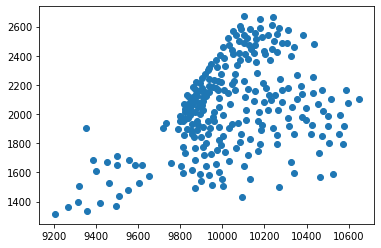

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
# Mapping
ids = pd.read_csv('taxi_zones_simple.csv')
plt.scatter(ids['X'], ids['Y'])


#for i, txt in enumerate(ids['ID']):
#    plt.annotate(txt, (ids.at[i,'X'], ids.at[i,'Y']))

plt.show()

In [86]:
from sklearn import mixture
cluster_train = ids.to_numpy()[1:,1:]
gmm = mixture.GaussianMixture(n_components=9).fit(cluster_train)

colors = ['orangered','saddlebrown','orange','forestgreen','lightseagreen','darkslategray','dodgerblue','royalblue','indigo']
for i in range(len(ids)):
    k = int(gmm.predict([[ids.at[i,'X'],ids.at[i,'Y']]]))
    ids.at[i,'K'] = k
    ids.at[i,'C'] = colors[k]

ids.tail(5)

,ID,X,Y,K,C
258,259,10240,2669,5.0,darkslategray
259,260,10109,2114,0.0,orangered
260,261,9807,1976,6.0,dodgerblue
261,262,9993,2222,6.0,dodgerblue
262,263,9978,2229,6.0,dodgerblue


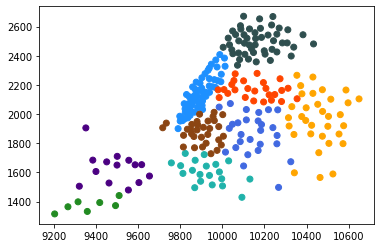

In [87]:
plt.scatter(ids['X'], ids['Y'], c=ids['C'])
# Clustering based on solely area

In [88]:
mapp = ids.drop(['X','Y','C'], axis=1)
mapp.to_csv('taxi_zones_simpler.csv')